### Universal approximation theorem
Neural networks are universal function approximators. They can be used to approximate ANY continuous function!

In [1]:
import dl2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import Image

The classical form of the universal approximation theorem for arbitrary width is as follows: The following formulation, due to Allan Pinkus,[9] extends the classical results of George Cybenko and Kurt Hornik.

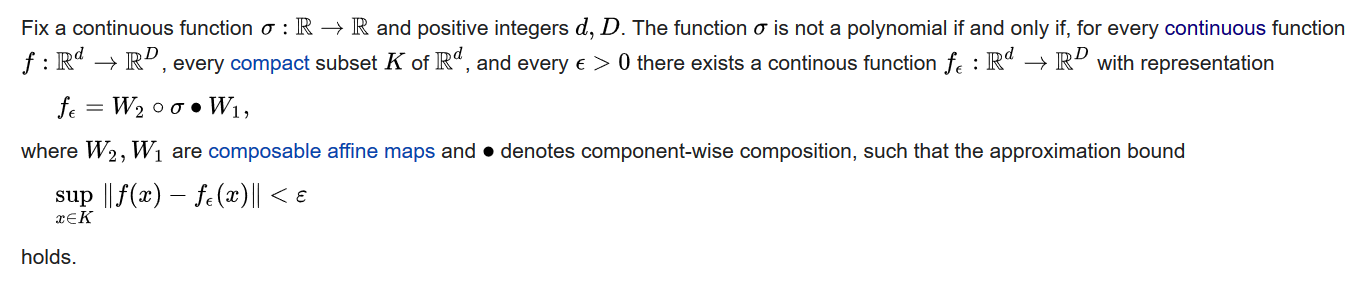

In [2]:
Image(filename='uat.png')

This theorem extends straightforwardly to networks with any fixed number of hidden layers: the theorem implies that the first layer can approximate any desired function and that later layers can approximate the identity function. Thus any fixed-depth network may approximate any continuous function, and this version of the theorem applies to networks with bounded depth and arbitrary width.

In [3]:
f = dl2.NN()
f.add(dl2.dense(50, input_dim=(1), activation='sigmoid'))
f.add(dl2.dense(1))
f.init()
f.info()

{'input_dim': 1, 'output_dim': 50, 'layer': 'dense', 'activation': 'sigmoid', 'use_bias': True, 'requires_wgrad': True}
{'input_dim': 50, 'output_dim': 1, 'layer': 'dense', 'activation': 'none', 'use_bias': True, 'requires_wgrad': True}
trainable parameters: 151


In [4]:
x = np.reshape(np.arange(0, 10, 0.01), (1000, 1))
y = x ** 2 + x - np.sqrt(x)

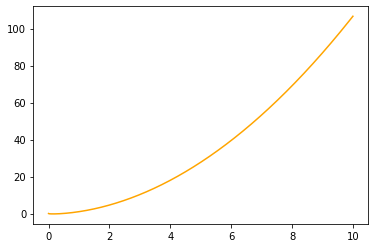

In [5]:
# function to approximate
plt.plot(x, y, c='orange')
plt.show()

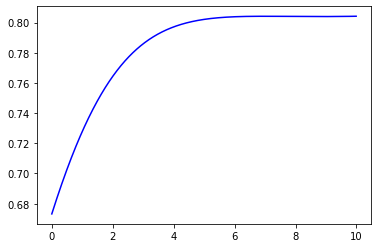

In [6]:
# NN approximation
plt.plot(x, [f.forward(xi) for xi in x], c='blue')
plt.show()

In [7]:
f.opt, f.loss_fn = dl2.GD(f.params(), 1e-4, 0), 'mse' # SGD and mean-squared-error loss
f.tqdm_disable = True
history = f.fit(x, y, epochs=2000, batch_size=10)

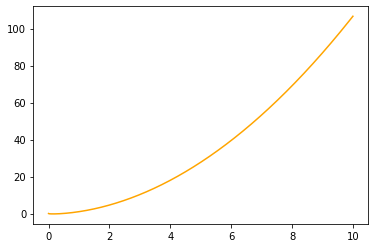

In [8]:
# function to approximate
plt.plot(x, y, c='orange')
plt.show()

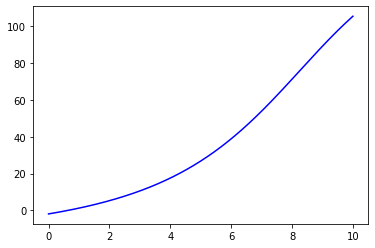

In [9]:
# NN approximation
plt.plot(x, [f.forward(xi) for xi in x], c='blue')
plt.show()